繪製世界地圖前,需要先下載：<br>
pip install pygal <br>
pip install pygal_maps_world<br>
pip install cairosvg

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

### Drinks
country:國家<br>
beer_servings:啤酒量<br>
spirit_servings:列酒量<br>
wine_servings:葡萄酒量<br>
total_litres_of_pure_alcohol:總攝取酒精量<br>
continent:洲別

In [2]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.shape

(193, 6)

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


### 繪製各洲各種酒類的三維散布圖

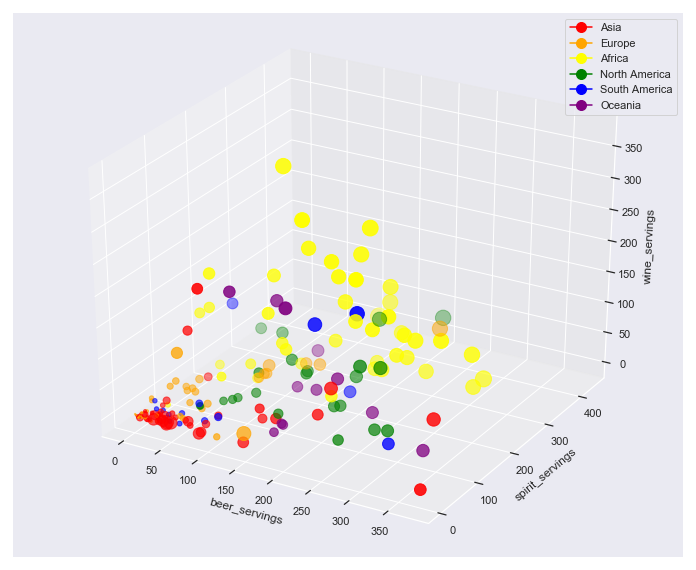

In [4]:
sns.set(rc={'figure.figsize':(12,10)},style="darkgrid")
ax = plt.subplot(111, projection='3d')

drinks['continent'] = pd.Categorical(drinks['continent'])
drinks['color'] = drinks['continent'].cat.codes

#[Africa, Asia, Europe, North America, Oceania, South America]
drinks.loc[drinks.continent == 'Africa', 'color'] = 'red'
drinks.loc[drinks.continent == 'Asia', 'color'] = 'orange'
drinks.loc[drinks.continent == 'Europe', 'color'] = 'yellow'
drinks.loc[drinks.continent == 'North America', 'color'] = 'green'
drinks.loc[drinks.continent == 'Oceania', 'color'] = 'blue'
drinks.loc[drinks.continent == 'South America', 'color'] = 'purple'

ax.scatter(drinks.beer_servings, drinks.spirit_servings, drinks.wine_servings, s = drinks.total_litres_of_pure_alcohol*20, c = drinks.color)
ax.set_zlabel('wine_servings')  # 坐标轴
ax.set_ylabel('spirit_servings')
ax.set_xlabel('beer_servings')

# Create customized legends

legend_elements = [plt.Line2D([0], [0], marker='o', c='red', label='Asia', markersize=10),
                   plt.Line2D([0], [0], marker='o', c='orange', label='Europe', markersize=10),
                   plt.Line2D([0], [0], marker='o', c='yellow', label='Africa', markersize=10),
                   plt.Line2D([0], [0], marker='o', c='green', label='North America', markersize=10),
                   plt.Line2D([0], [0], marker='o', c='blue', label='South America', markersize=10),
                   plt.Line2D([0], [0], marker='o', c='purple', label='Oceania', markersize=10)
                  ]


# Make legend

ax.legend(handles=legend_elements, loc='best')

plt.show()

In [5]:
D_change = pd.melt(drinks, id_vars=['continent'], value_vars=['beer_servings','spirit_servings', 'wine_servings'], var_name = 'catagory', value_name = 'serving')
D_change.head()

,continent,catagory,serving
0,Asia,beer_servings,0
1,Europe,beer_servings,89
2,Africa,beer_servings,25
3,Europe,beer_servings,245
4,Africa,beer_servings,217


### 各洲各種酒類的折線圖

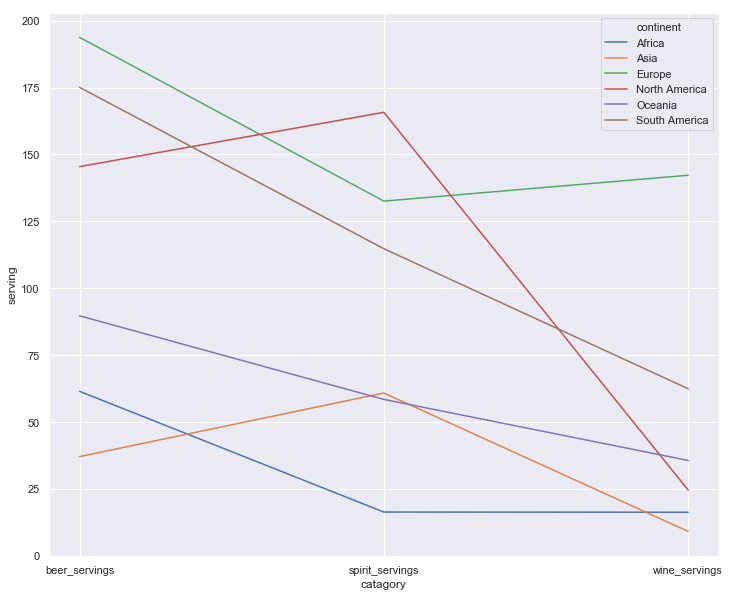

In [6]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="catagory", y="serving",
             hue="continent", ci = None, data=D_change)

In [7]:
D_group = drinks.groupby('continent').sum()

In [8]:
D_group.index

CategoricalIndex(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
                  'South America'],
                 categories=['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ordered=False, name='continent', dtype='category')

In [9]:
D_group.loc['Africa','beer_servings']

3258.0

In [10]:
import pygal
from pygal_maps_world.i18n import COUNTRIES
def get_country_code(country_name):
    # 根據指定的國家,返回Pygal使用得兩個字母的國別碼
    for code, name in COUNTRIES.items():
        if name == country_name:
            return code
    # 如果沒有找到指定的國家,就返回None
    return None

#測試
print(get_country_code('Andorra'))
print(get_country_code('United Arab Emirates'))
print(get_country_code('Afghanistan'))

ad
ae
af


In [11]:
cc_beer_servings = {}
c_code = []
for beer, con in zip(drinks["beer_servings"],drinks["country"]):
    c_code.append(get_country_code(con))
    code=get_country_code(con)
    if code:
        cc_beer_servings[code]=beer
cc_beer_servings['us'] = drinks.loc[drinks.country == 'USA','beer_servings'].values

In [13]:
import pygal_maps_world.maps
worldmap_chart = pygal_maps_world.maps.World()
worldmap_chart.title = 'beer servings by country'
worldmap_chart.add('Beer', cc_beer_servings)
#worldmap_chart.render()
worldmap_chart.render_to_file('beerMap.html')

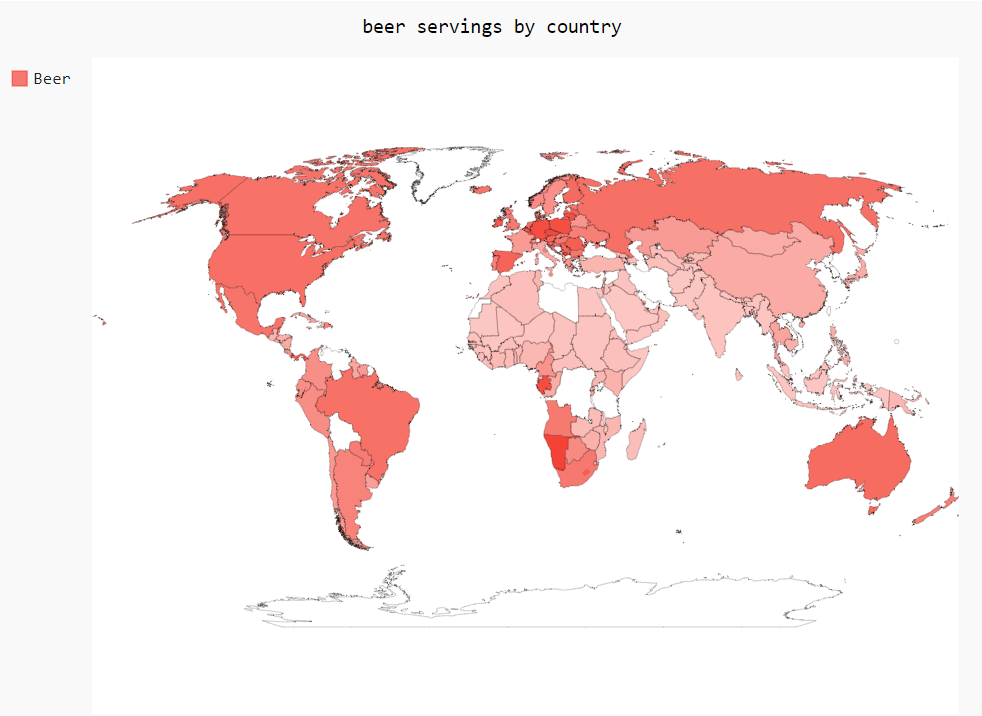